In [3]:
# Крок 1: Завантажте файл Housing.csv. Виведіть перші 5 рядків.
import pandas as pd
import numpy as np

file_path = '/content/Housing .csv'
df = pd.read_csv(file_path)
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [4]:
# Крок 2: Зробіть новий датасет, який містить тільки ці стовпчики.
columns = ['price', 'area', 'bedrooms', 'bathrooms']
new_df = df[columns]

In [5]:
#Крок 3:
# Заміна '-' на NaN
new_df.replace('-', np.nan, inplace=True)

# Зміна типу даних на float
new_df = new_df.astype(float)

# Заміна NaN середнім значенням за стовпчиком
new_df.fillna(new_df.mean(), inplace=True)

# Виведення перших 5 рядків нового датасету
print(new_df.head())

        price    area  bedrooms  bathrooms
0  13300000.0  7420.0       4.0        2.0
1  12250000.0  8960.0       4.0        4.0
2  12250000.0  9960.0       3.0        2.0
3  12215000.0  7500.0       4.0        2.0
4  11410000.0  7420.0       4.0        1.0


<ipython-input-5-dc5976054191>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.replace('-', np.nan, inplace=True)


In [6]:
# Крок 4: Нормалізація даних
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
new_df_normalized = scaler.fit_transform(new_df)

In [7]:
# Крок 5: Розділіть дані на навчальний та тестовий набори
from sklearn.model_selection import train_test_split

X = new_df_normalized[:, 1:]
y = new_df_normalized[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Підготуйте дані: виберіть атрибути (площа, кількість ванних кімнат, кількість спалень) та цільову змінну (ціну на будинок).

X = new_df[['area', 'bedrooms', 'bathrooms']]
y = new_df['price']

In [34]:
# Крок 7: Побудуйте модель лінійної регресії та навчіть її на навчальних даних.
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
#Крок 8
# Якість моделі на тестових даних
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Крос-валідація
cv_score = cross_val_score(model, new_df_normalized[:, 1:], new_df_normalized[:, 0], cv=5)

print(f'RMSE: {rmse}')
print(f'R^2: {r2}')
print(f'Крос-валідації: {cv_score}')

RMSE: 0.8874106823867896
R^2: 0.45592991188724463
Крос-валідації: [ -3.23415827  -7.66529992 -16.80680846 -27.88609775 -14.3534265 ]


In [36]:
from sklearn.model_selection import cross_val_score

cross_val_r2 = cross_val_score(model, X, y, cv=5, scoring='r2').mean()
print("Коефіцієнт детермінації (R^2) після крос-валідації:", cross_val_r2)

Коефіцієнт детермінації (R^2) після крос-валідації: -13.98915818011171


In [50]:
#Крок 9 Виконайте аналіз результатів та виведіть прогнозовані ціни на будинки для тестового набору даних.
predicted_prices = scaler.inverse_transform(np.column_stack((y_pred, X_test)))
predicted_df = pd.DataFrame(data=predicted_prices, columns=['Predicted Price', 'Area', 'Bedrooms', 'Bathrooms'])
actual_prices = scaler.inverse_transform(np.column_stack((y_test.reshape(-1, 1), X_test)))
actual_df = pd.DataFrame(data=actual_prices, columns=['Actual Price', 'Area', 'Bedrooms', 'Bathrooms'])

comparison_df = pd.concat([actual_df, predicted_df], axis=1)
print("Фактичні та прогнозовані ціни на будинки для тестового набору даних:", comparison_df)

Фактичні та прогнозовані ціни на будинки для тестового набору даних:
      Actual Price    Area  Bedrooms  Bathrooms  Predicted Price    Area  \
0       4060000.0  5900.0       4.0        2.0     6.383168e+06  5900.0   
1       6650000.0  6500.0       3.0        2.0     6.230250e+06  6500.0   
2       3710000.0  4040.0       2.0        1.0     3.597885e+06  4040.0   
3       6440000.0  5000.0       3.0        1.0     4.289731e+06  5000.0   
4       2800000.0  3960.0       3.0        1.0     3.930446e+06  3960.0   
..            ...     ...       ...        ...              ...     ...   
104     9100000.0  6000.0       4.0        1.0     4.995395e+06  6000.0   
105     3773000.0  6930.0       4.0        1.0     5.316679e+06  6930.0   
106     7910000.0  6000.0       4.0        2.0     6.417715e+06  6000.0   
107     7350000.0  6000.0       3.0        2.0     6.057517e+06  6000.0   
108     5530000.0  6100.0       3.0        2.0     6.092064e+06  6100.0   

     Bedrooms  Bathrooms  
0 

In [52]:
#Ч.2 Визначте аналітично коефіцієнти лінійної регресії (ваги моделі) для цієї задачі, використовуючи формулу для спрощеного аналітичного рішення лінійної регресії.
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]

theta_analytical = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y

print("Аналітичні ваги моделі:", theta_analytical)

Аналітичні ваги моделі: [-1.73171608e+05  3.78762754e+02  4.06820034e+05  1.38604950e+06]


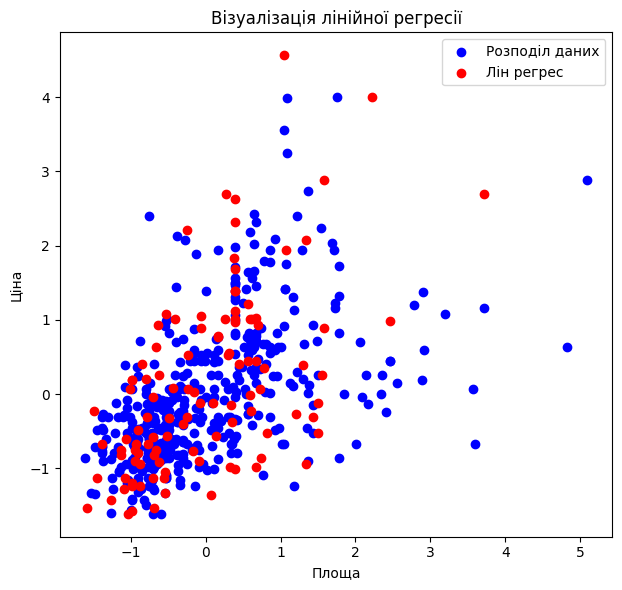

In [74]:
#ч3 Візуалізуйте дані та результати регресії: побудуйте графіки для ознайомлення з розподілом даних і лінійною регресійною моделлю.
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], y_train, color='blue', label='Розподіл даних')
plt.scatter(X_test[:, 0], y_test, color='red', label='Лін регрес')
plt.title('Візуалізація лінійної регресії')
plt.xlabel('Площа')
plt.ylabel('Ціна')
plt.legend()



plt.tight_layout()
plt.show()


In [77]:
# Отримання коефіцієнтів лінійної регресії
intercept_sklearn = model.intercept_
coefficients_sklearn = model.coef_

# Виведення коефіцієнтів з обох методів
print("Аналітичні коефіцієнти моделі:", theta_analytical)
print("Коефіцієнти лінійної регресії:")
print("Перехоплення :", intercept_sklearn)
print("Коефіцієнти :", coefficients_sklearn)


Аналітичні коефіцієнти моделі: [-1.73171608e+05  3.78762754e+02  4.06820034e+05  1.38604950e+06]
Коефіцієнти лінійної регресії:
Перехоплення : -0.016281754425403302
Коефіцієнти : [0.40082084 0.14213176 0.38208794]


11. Зробіть висновки щодо ефективності лінійної регресії у прогнозуванні цін на будинок на основі вказаних атрибутів та порівняння з аналітичним рішенням
--
Значення R^2 = 0.45592991188724463 означає, що велика частина варіації в цільовій змінній пояснюється моделлю. RMSE = 0.8874106823867896, високе значення RMSE може свідчити про те, що модель не добре враховує реальний розподіл даних. Модель добре апроксимує точки на графіку, це також є позитивним показником.

Висновок: дана робота включає створення та оцінку моделі лінійної регресії для прогнозування цін на будинки. Основні крок роботи: підготовка, аналіз, нормалізація даних, побудова та навчання моделі, оцінка її якості, порівняння результатів та їх візуалізація.